# Импорт библиотек

In [2]:
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2lab, rgb2gray
import random

# Конвертация видео

In [ ]:
xmin, ymin = 115, 210
xmax, ymax = 350, 445

capture = cv2.VideoCapture('Camera_3_20220526_003249.mp4')

frame_number = 0
success, frame = capture.read(frame_number)

while success:
    if frame_number % 15 == 0:
        img = cv2.resize(frame[xmin:xmax, ymin:ymax], (116, 116))
        cv2.imwrite(f'not_working/frame_{frame_number}.jpg', img)

    frame_number += 1
    success, frame = capture.read(frame_number)
    # break
    
# Затем сортируем по папкам вручную

# Загрузка выборки

In [2]:
# Функция для перемешивания выборки
def shuffle_train(x, y):
    p = np.random.permutation(len(x))
    return x[p], y[p]

In [6]:
X = []
Y = []

for filename in os.listdir('working'):
    img = cv2.imread('working/' + filename)
    img = rgb2gray(img)
    X.append(img)
    Y.append(1)

for filename in os.listdir('not_working'):
    img = cv2.imread('not_working/' + filename)
    img = rgb2gray(img)
    X.append(img)
    Y.append(0)
    
X, Y = shuffle_train(np.array(X), np.array(Y))

(26378, 116, 116)
0


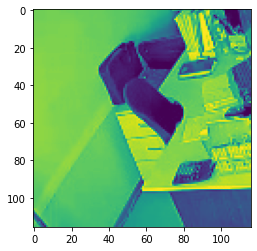

In [7]:
rand_indx = random.randrange(len(X))
plt.imshow(X[rand_indx])
print(X.shape, Y[rand_indx], sep='\n')

# Создание модели

In [12]:
model = keras.Sequential()

model.add(keras.layers.Input(shape=(*X[0].shape, 1)))
model.add(keras.layers.Conv2D(8, (3, 3), strides=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=2, padding='valid', data_format=None))
# model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(keras.layers.MaxPooling2D((2, 2), strides=2, padding='valid', data_format=None))
# model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(keras.layers.MaxPooling2D((2, 2), strides=2, padding='valid', data_format=None))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))

myAdam = keras.optimizers.Adam(
    learning_rate=0.001
)

mySGD = keras.optimizers.SGD(
    learning_rate=0.1,
    momentum=0.1,     
    nesterov=True     
)

model.compile(
    optimizer=mySGD,
    loss='mean_squared_error',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 58, 58, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 8)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6728)              0         
                                                                 
 dense_9 (Dense)             (None, 16)                107664    
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                      

# Обучение модели

Epoch 1/3


2022-07-17 17:58:09.173812: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1135794048 exceeds 10% of free system memory.


1319/1319 [==============================] - 4s 3ms/step - loss: 0.0227 - accuracy: 0.9715 - val_loss: 0.0049 - val_accuracy: 0.9947
Epoch 2/3
1319/1319 [==============================] - 4s 3ms/step - loss: 0.0041 - accuracy: 0.9951 - val_loss: 0.0033 - val_accuracy: 0.9966
Epoch 3/3
1319/1319 [==============================] - 4s 3ms/step - loss: 0.0029 - accuracy: 0.9962 - val_loss: 0.0030 - val_accuracy: 0.9962


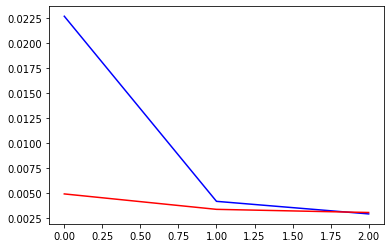

In [13]:
log = model.fit(
    X,
    Y,
    batch_size=16,
    epochs=3,
    # shuffle=True,
    validation_split=0.2,
)

ax = plt.axes()

ax.plot(log.history['loss'], color='blue')
ax.plot(log.history['val_loss'], color='red')
plt.show()

# Проверка

1/1 [==============================] - 0s 15ms/step
1


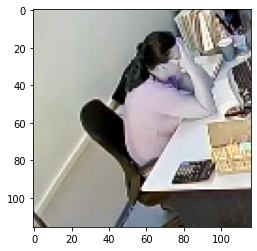

1/1 [==============================] - 0s 10ms/step
1


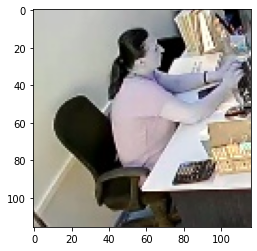

1/1 [==============================] - 0s 10ms/step
0


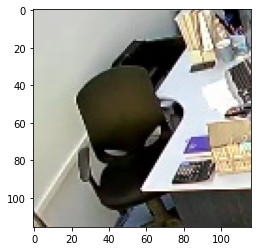

1/1 [==============================] - 0s 9ms/step
1


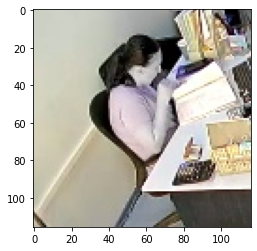

1/1 [==============================] - 0s 9ms/step
0


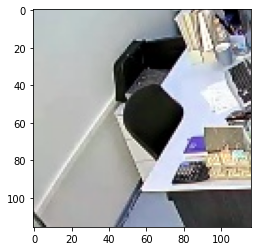

In [19]:
for i in range(5):
    directory = 'working/' if random.randrange(2) == 0 else 'not_working/'
    w_n = os.listdir(directory)
    img = cv2.imread(directory + w_n[random.randrange(len(w_n))])
    pred = model.predict(np.expand_dims(rgb2gray(img), 0))
    print(1) if pred > 0.5 else print(0)
    plt.imshow(img)
    plt.show()


# Сохраняем модель

In [16]:
model.save('nns/model_0')

INFO:tensorflow:Assets written to: nns/model_0/assets


INFO:tensorflow:Assets written to: nns/model_0/assets
